In [106]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import plotly.graph_objects as go # Создаем фигуру с заданными размерами
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# PCA (Principal Component Analysis) из sklearn.decomposition применяется для сокращения размерности данных
# путем выделения наиболее значимых компонентов.
from sklearn.decomposition import PCA

In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abbasit/titanic")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\abbasit\titanic\versions\1


In [35]:
df = pd.read_csv(path + "/titanic_train.csv")

In [36]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [39]:
df = df.drop(columns=['Cabin'])

In [40]:
df.shape

(891, 11)

In [41]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [42]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [43]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [44]:
df['Embarked'].mode()[0]

'S'

In [45]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_17712\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [46]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.000000
dtype: float64

In [47]:
df['Age'].median()

28.0

In [48]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_17712\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [49]:
df.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [50]:
df.describe(include=['object'])

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


In [51]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [52]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [54]:
# Кодируем категориальную переменную
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [55]:
df_encoded

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,True,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,True
888,889,0,3,28.0,1,2,23.4500,False,False,True
889,890,1,1,26.0,0,0,30.0000,True,False,False


In [63]:
df_encoded.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
df_encoded.shape[1]

10

In [74]:
df_encoded.drop(columns=['PassengerId'], inplace=True)

In [76]:
unique_col = [f'Колонка {col}: {df_encoded[col].unique()}' for col in df_encoded.columns]
for uniqc in unique_col:
    print(uniqc)

Колонка Survived: [0 1]
Колонка Pclass: [3 1 2]
Колонка Age: [22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]
Колонка SibSp: [1 0 3 4 2 5 8]
Колонка Parch: [0 1 2 5 3 4 6]
Колонка Fare: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5    

In [78]:
scal_data  = pd.DataFrame(MinMaxScaler().fit_transform(df_encoded), columns=df_encoded.columns)

In [79]:
scal_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,0.0,1.0,0.346569,0.125,0.333333,0.045771,0.0,0.0,1.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


In [80]:
y = df_encoded['Survived']
df_encoded.drop(columns=['Survived'], inplace=True)

# Кластеризация методом k-means

In [81]:
# Создание пайплайна
pipeline = Pipeline([('kmeans', KMeans(random_state=42))])

In [94]:
# Параметры для перебора
parameters = {
    'kmeans__n_clusters': [claster for claster in range(2, 11)],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__max_iter': [100, 200, 300, 500],
    # 'kmeans__algorithm': ["lloyd", "elkan"]
}

In [95]:
df_encoded.shape

(891, 8)

In [96]:
# Настройка GridSearch с силуэтным коэффициентом
grid_search = GridSearchCV(
    pipeline, 
    parameters, 
    scoring=lambda estimator, X: silhouette_score(X, estimator.named_steps['kmeans'].labels_, metric='euclidean')
)
grid_search.fit(df_encoded)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Temp\ipykernel_17712\423120105.py", line 5, in <lambda>
    scoring=lambda estimator, X: silhouette_score(X, estimator.named_steps['kmeans'].labels_, metric='euclidean')
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^

GridSearchCV(estimator=Pipeline(steps=[('kmeans', KMeans(random_state=42))]),
             param_grid={'kmeans__init': ['k-means++', 'random'],
                         'kmeans__max_iter': [100, 200, 300, 500],
                         'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring=<function <lambda> at 0x0000012C7EC95300>)

In [93]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший силуэтный коэффициент:", grid_search.best_score_)

Лучшие параметры: {'kmeans__init': 'k-means++', 'kmeans__max_iter': 100, 'kmeans__n_clusters': 2}
Лучший силуэтный коэффициент: nan


In [97]:
# создадим пустой список для записи показателя WCSS (ошибки, cуммы квадратов внутрикластерных расстояний)
wcss = []

# воспользуемся функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
min_range = 1
max_range = 11 # до максимального, не включая

for i in range(min_range, max_range):
    # настроим параметры модели
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 42)

    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(df_encoded)

    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)

In [101]:
# Создаем фигуру с заданными размерами
fig = go.Figure()

# Добавляем линейный график с данными о WCSS по количеству кластеров
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wcss, mode='lines', name='WCSS'))

# Настройка заголовков и осей
fig.update_layout(
    title='Выбор количества кластеров методом локтя',
    xaxis_title='Количество кластеров',
    yaxis_title='WCSS'
)

# Отображаем график
fig.show()

In [103]:
# Уменьшение размерности входных данных с помощью PCA
reduced_data = PCA(n_components=2).fit_transform(df_encoded) # использовать, когда более 3 признаков
reduced_data

array([[-25.1505993 ,  -6.69327652],
       [ 39.31183676,   7.5837465 ],
       [-24.36896003,  -2.69724206],
       ...,
       [ -8.7857785 ,  -1.16738143],
       [ -2.28512802,  -3.25762908],
       [-24.38181205,   3.30535083]])

For n_clusters = 2 The average silhouette_score is : 0.7922694781940532
For n_clusters = 3 The average silhouette_score is : 0.7217985712632972
For n_clusters = 4 The average silhouette_score is : 0.6383928718492874
For n_clusters = 5 The average silhouette_score is : 0.42331932644899245
For n_clusters = 6 The average silhouette_score is : 0.43370220273715593
For n_clusters = 7 The average silhouette_score is : 0.487032755568881
For n_clusters = 8 The average silhouette_score is : 0.4993944172061257
For n_clusters = 9 The average silhouette_score is : 0.4585013240893895
For n_clusters = 10 The average silhouette_score is : 0.44306239475978815


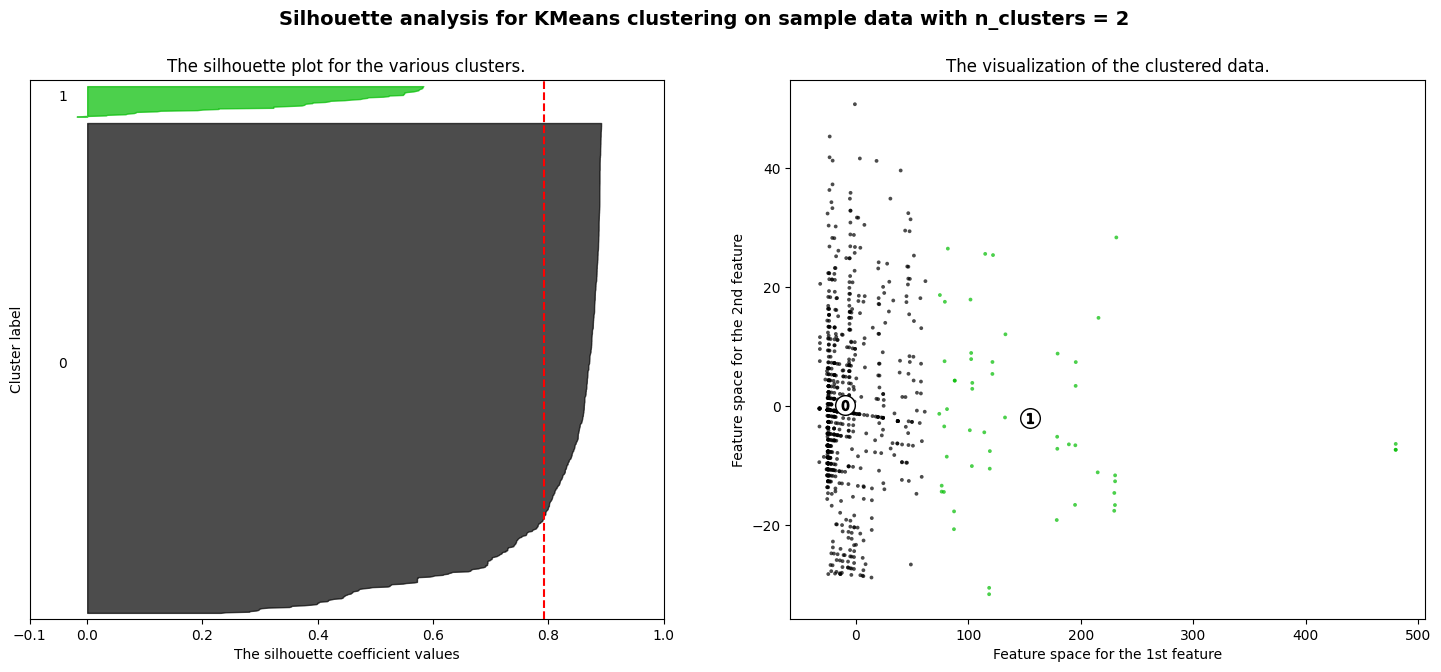

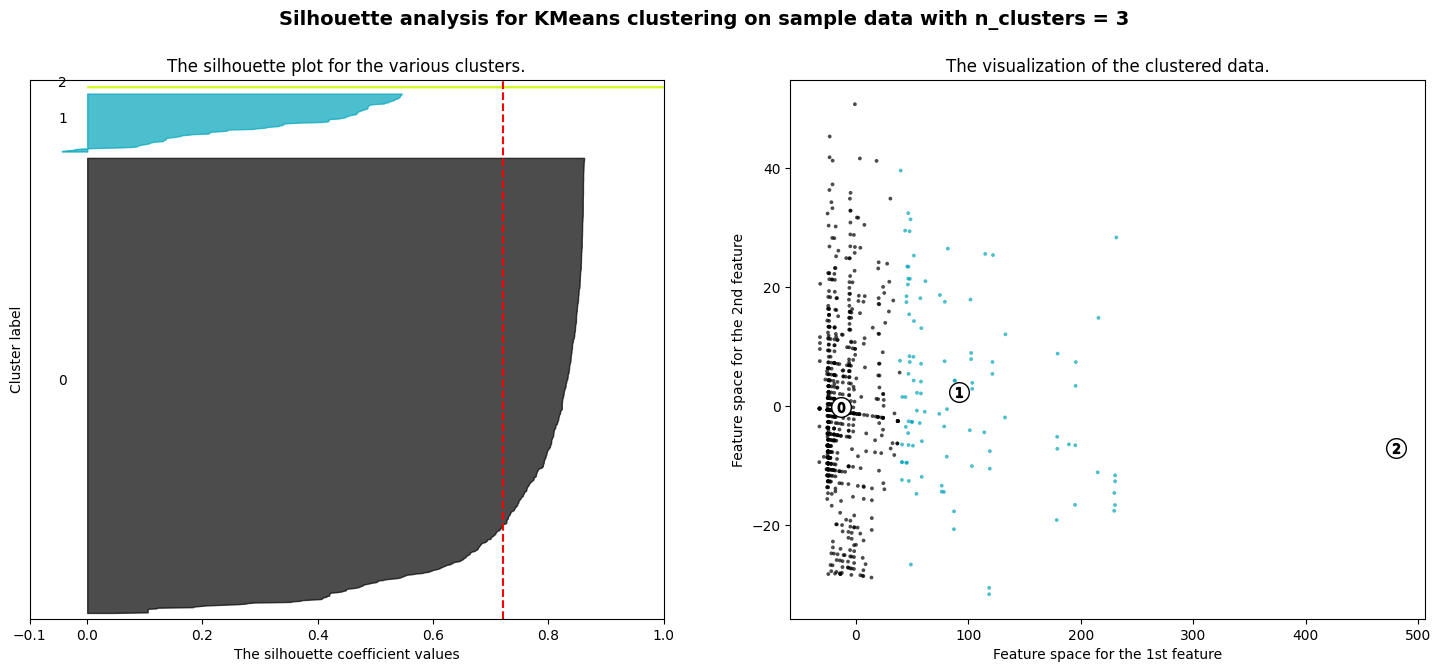

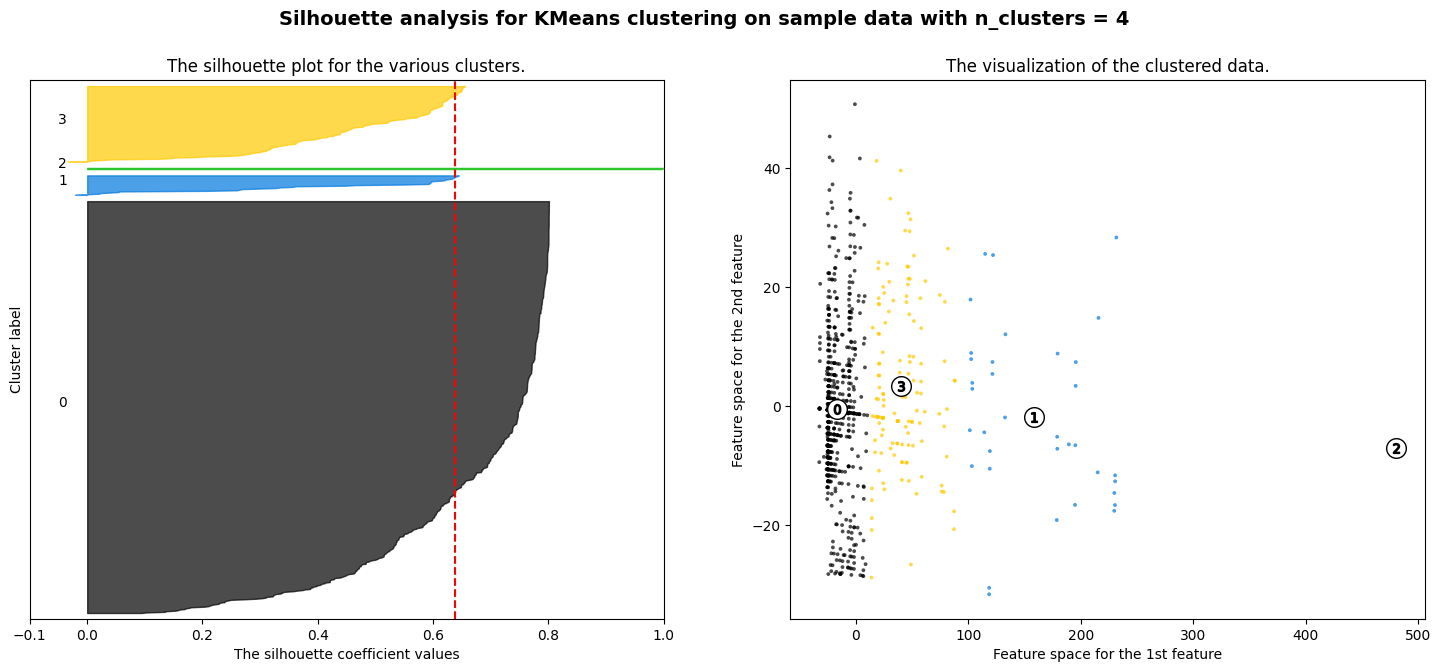

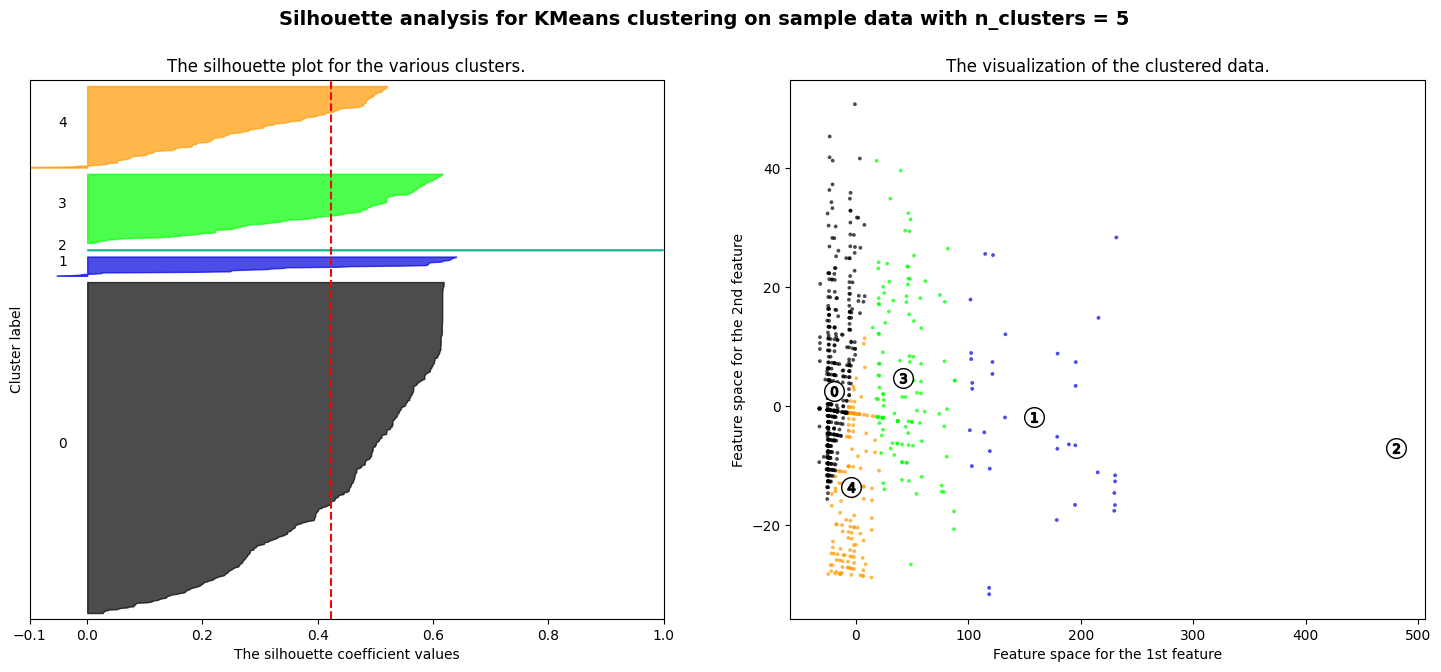

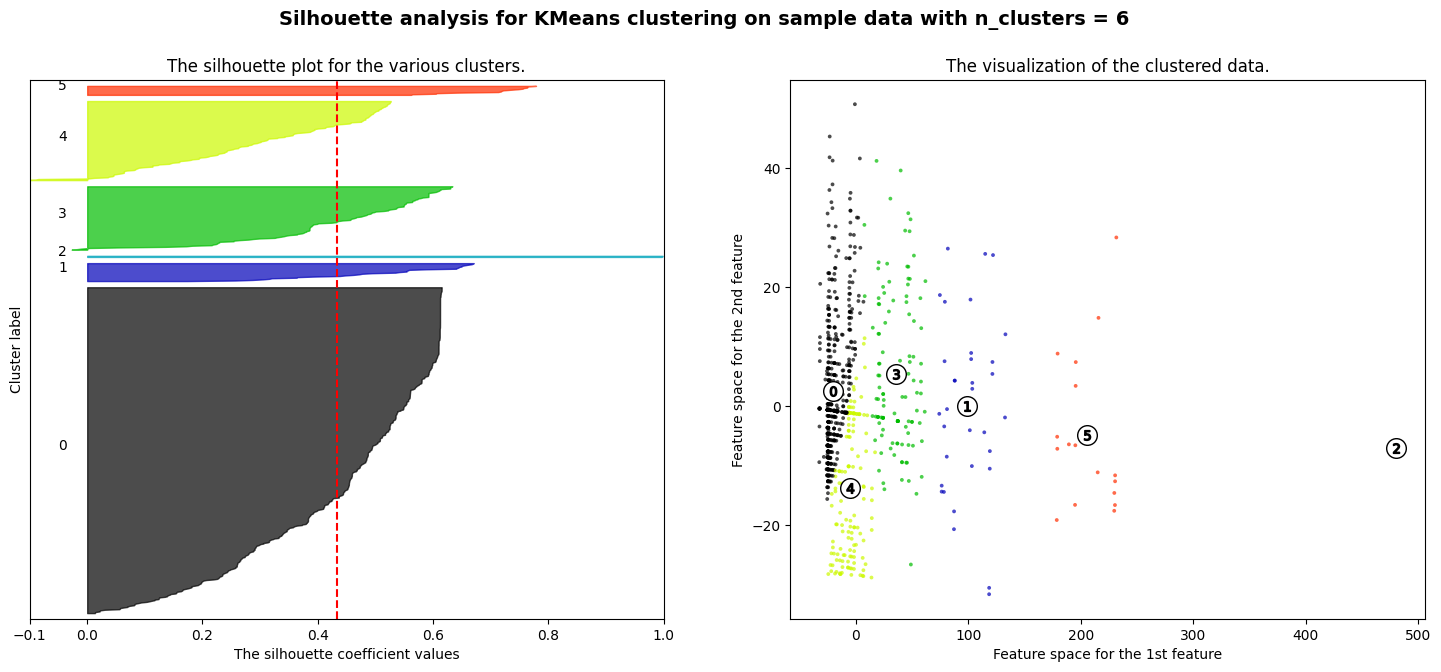

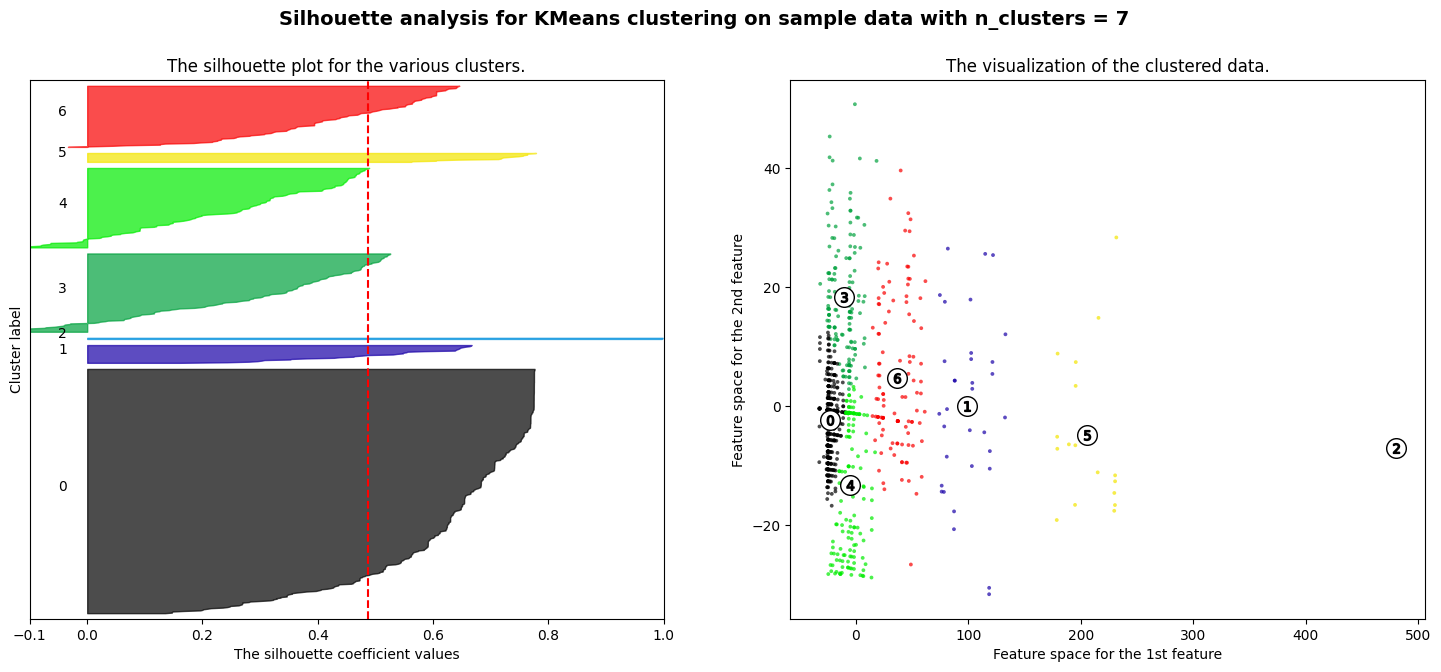

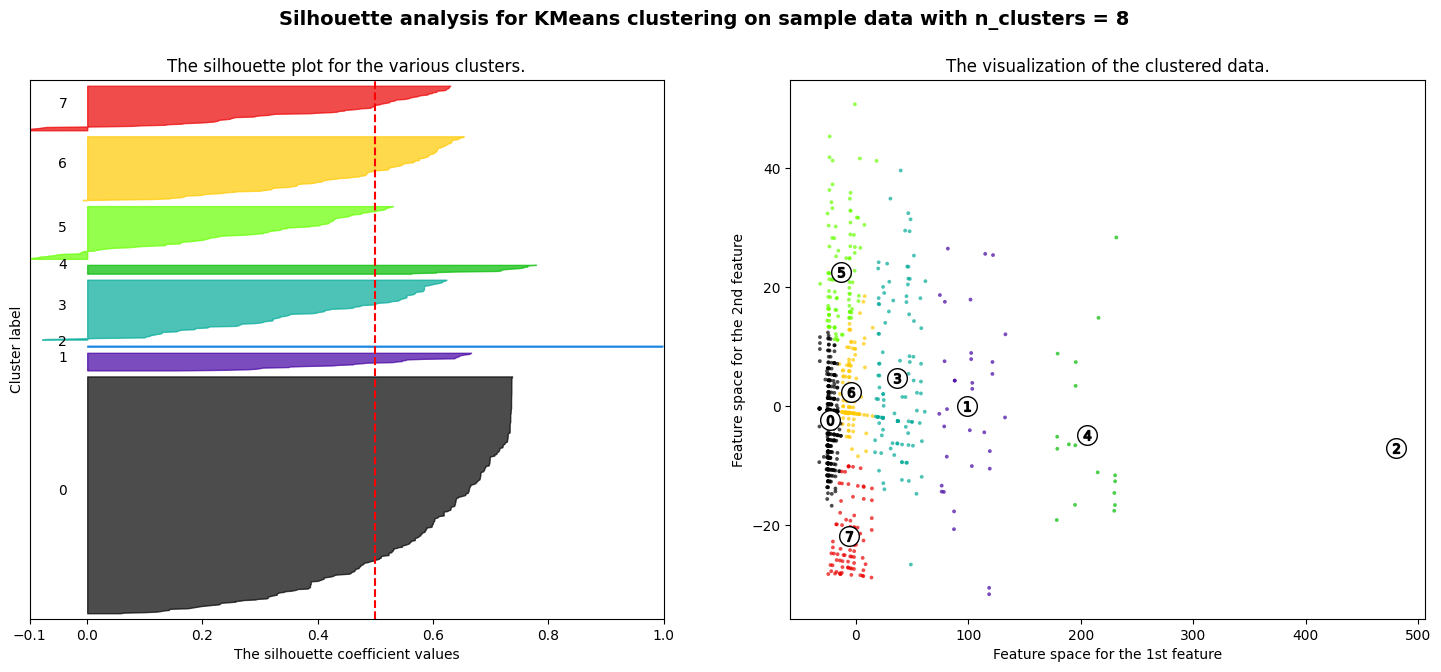

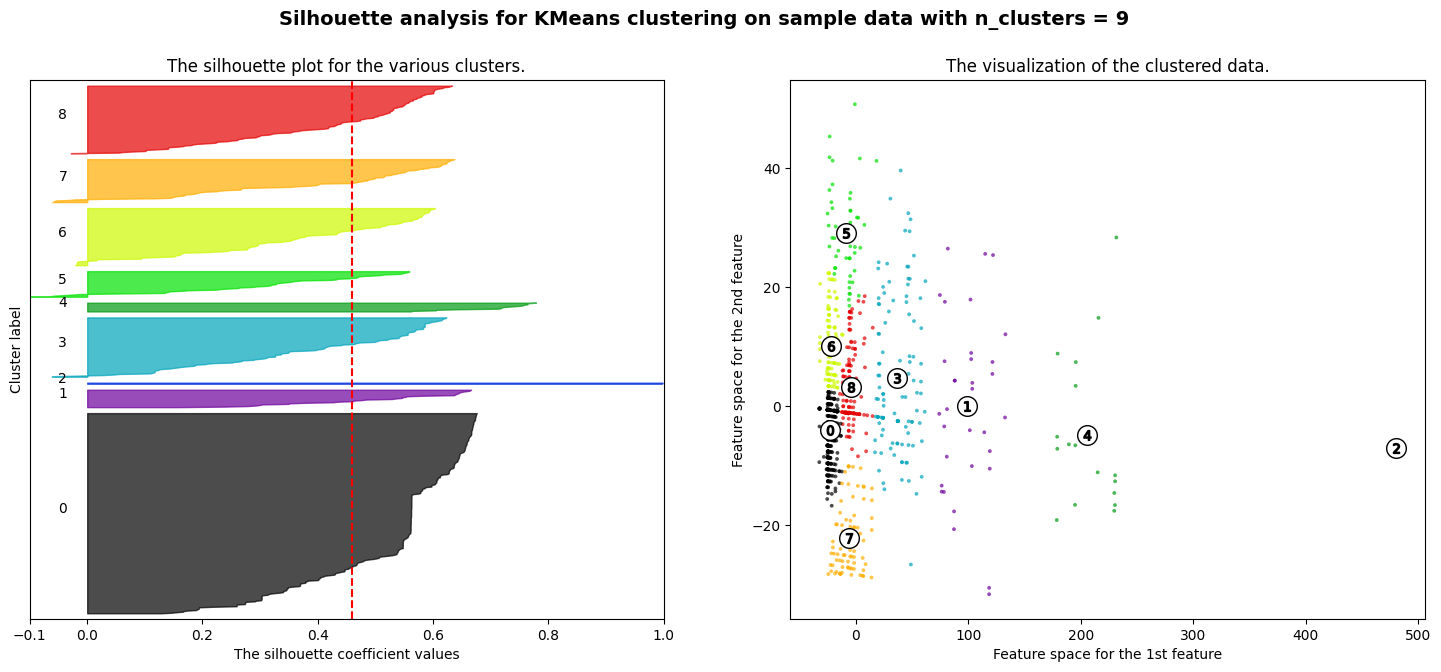

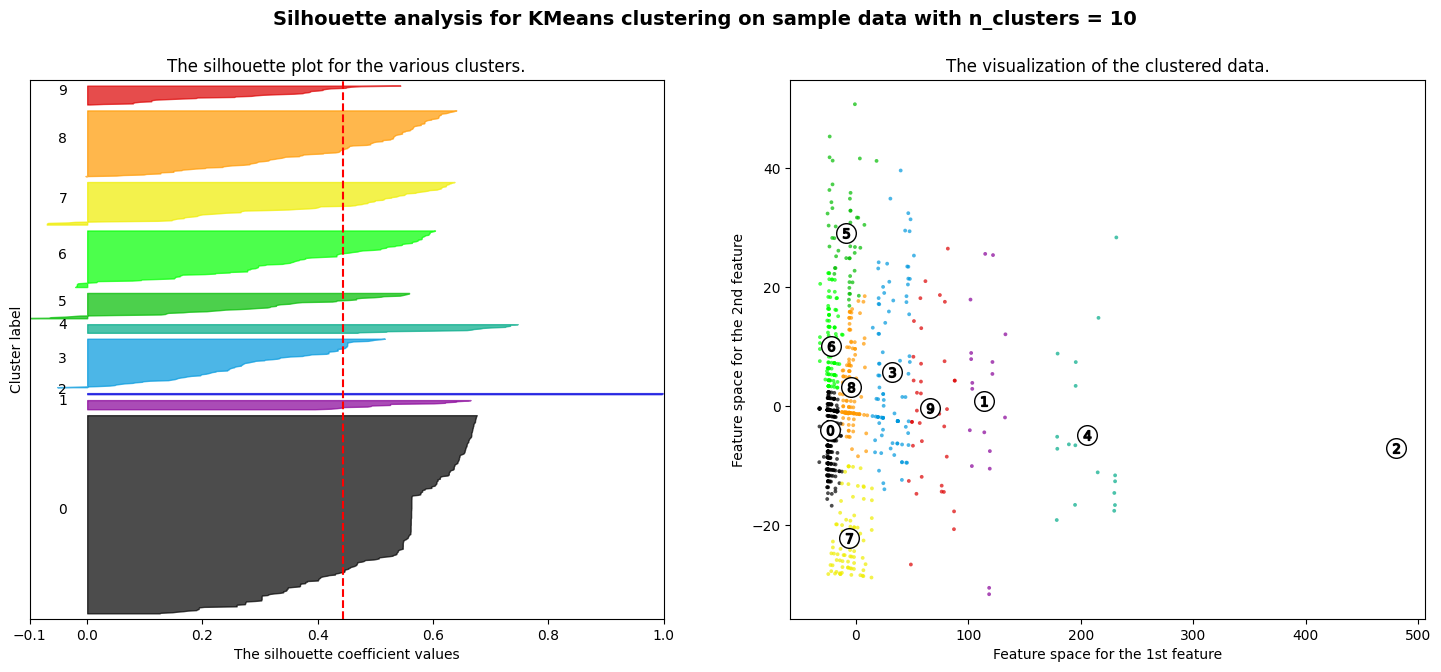

In [107]:
# Создадим пустой список для записи коэффициентов силуэта для каждого образца
sample_silhouette_values = []

# Воспользуемся функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
min_range = 2
max_range = 11  # до максимального, не включая

for i in range(min_range, max_range):
    # Создайте подзаголовок с 1 строкой и 2 столбцами
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Первый подсюжет — это график силуэта
    # Коэффициент силуэта может варьироваться от -1 до 1, но в этом примере все
    # лежат в пределах [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 предназначен для вставки пустого пространства между силуэтами
    # графики отдельных кластеров, чтобы четко их разграничить.
    ax1.set_ylim([0, len(reduced_data) + (i + 1) * 10])

    # Инициализируем кластеризатор значением n_clusters и генератором случайных чисел
    # начальное число из 10 для воспроизводимости.
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(reduced_data)

    # Silhouette_score дает среднее значение для всех образцов.
    # Это дает представление о плотности и разделении образовавшихся
    # clusters
    silhouette_avg = silhouette_score(reduced_data, cluster_labels)
    print(
        "For n_clusters =", i, "The average silhouette_score is :", silhouette_avg,
    ) # рассчет коэффициента, можно без визуализации

    # Вычисляем оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

    y_lower = 10
    for j in range(i):
        # Объединить оценки силуэтов для образцов, принадлежащих
        # кластер j и отсортируйте их
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]

        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / i)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            jth_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Пометьте графики силуэтов номерами их кластеров посередине.
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Вычисляем новый y_lower для следующего графика
        y_lower = y_upper + 10  # 10 для 0 образцов

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Вертикальная линия для средней оценки силуэта всех значений.
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Очистите метки/галочки Yaxis
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й график, показывающий фактически сформированные кластеры
    colors = cm.nipy_spectral(cluster_labels.astype(float) / i)
    ax2.scatter(
        reduced_data[:, 0], reduced_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Маркировка кластеров
    centers = clusterer.cluster_centers_
    # Нарисуйте белые круги в центрах кластеров
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for k, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % k, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % i,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [108]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [110]:
# Подсчет количества экземпляров каждого класса
class_counts = y.value_counts()

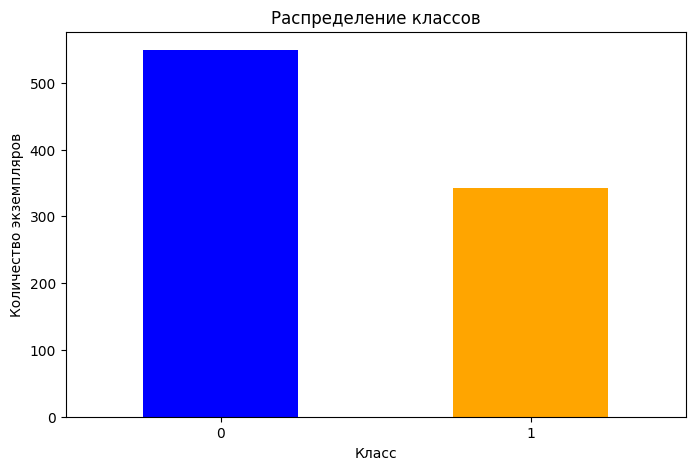

In [111]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество экземпляров')
plt.xticks(rotation=0)
plt.show()

# Добавить Survived

In [112]:
full_encoded = df_encoded
full_encoded['Survived'] = y
full_encoded

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,True,False,True,0
1,1,38.0,1,0,71.2833,False,False,False,1
2,3,26.0,0,0,7.9250,False,False,True,1
3,1,35.0,1,0,53.1000,False,False,True,1
4,3,35.0,0,0,8.0500,True,False,True,0
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True,False,True,0
887,1,19.0,0,0,30.0000,False,False,True,1
888,3,28.0,1,2,23.4500,False,False,True,0
889,1,26.0,0,0,30.0000,True,False,False,1


In [114]:
# Уменьшение размерности входных данных с помощью PCA
full_reduced_data = PCA(n_components=2).fit_transform(full_encoded) # использовать, когда более 3 признаков
full_reduced_data

array([[-25.15148027,  -6.69214573],
       [ 39.31325627,   7.58194076],
       [-24.36733307,  -2.69957686],
       ...,
       [ -8.78671452,  -1.16613332],
       [ -2.28357036,  -3.25975692],
       [-24.3827017 ,   3.30642823]])

For n_clusters = 2 The average silhouette_score is : 0.7922678887630664
For n_clusters = 3 The average silhouette_score is : 0.7217974051144932
For n_clusters = 4 The average silhouette_score is : 0.6383913842933702
For n_clusters = 5 The average silhouette_score is : 0.4233247288100772
For n_clusters = 6 The average silhouette_score is : 0.43370705090544837
For n_clusters = 7 The average silhouette_score is : 0.48703128844236093
For n_clusters = 8 The average silhouette_score is : 0.49939309097062995
For n_clusters = 9 The average silhouette_score is : 0.4585026084459077
For n_clusters = 10 The average silhouette_score is : 0.44306463932553636


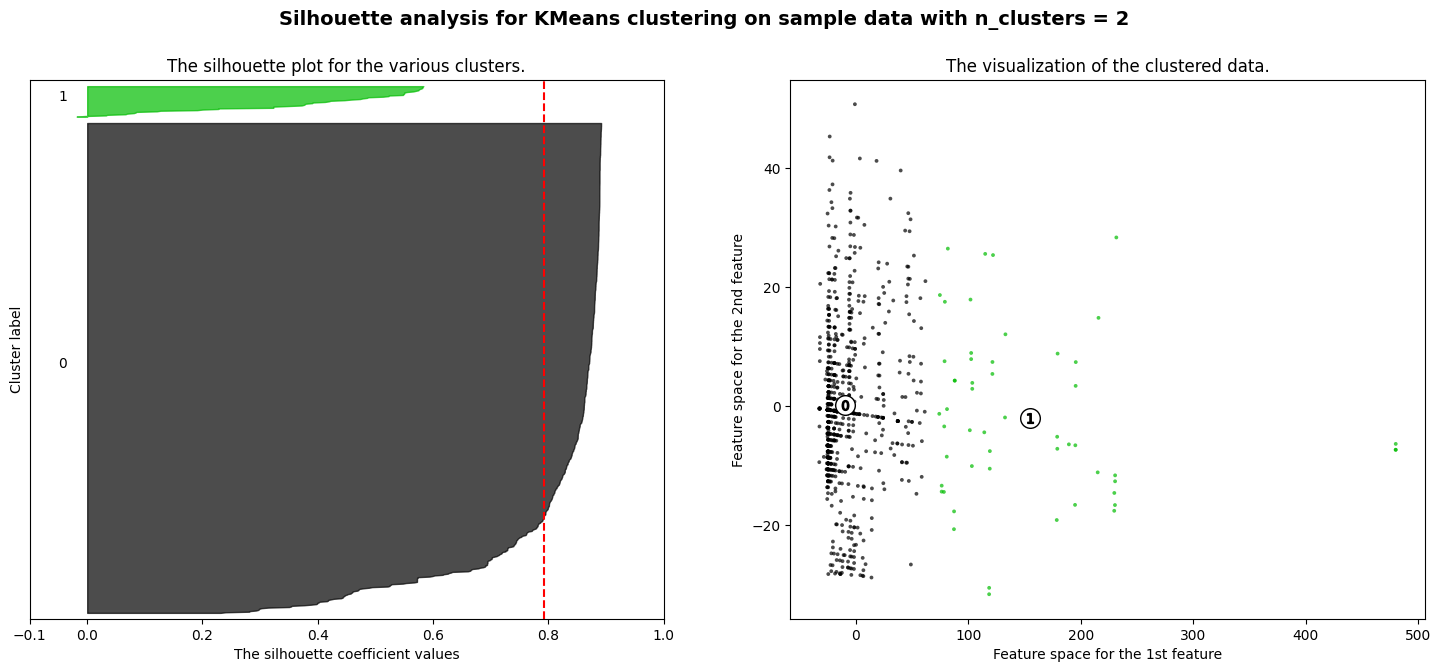

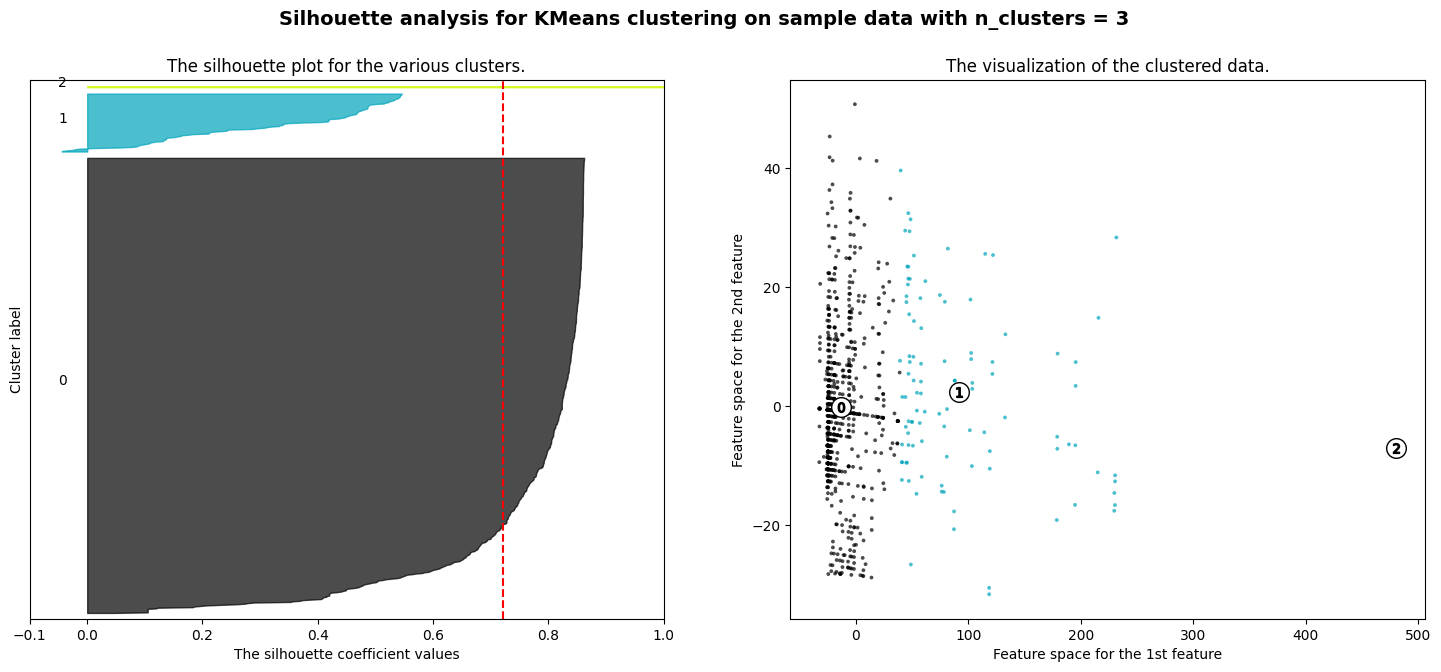

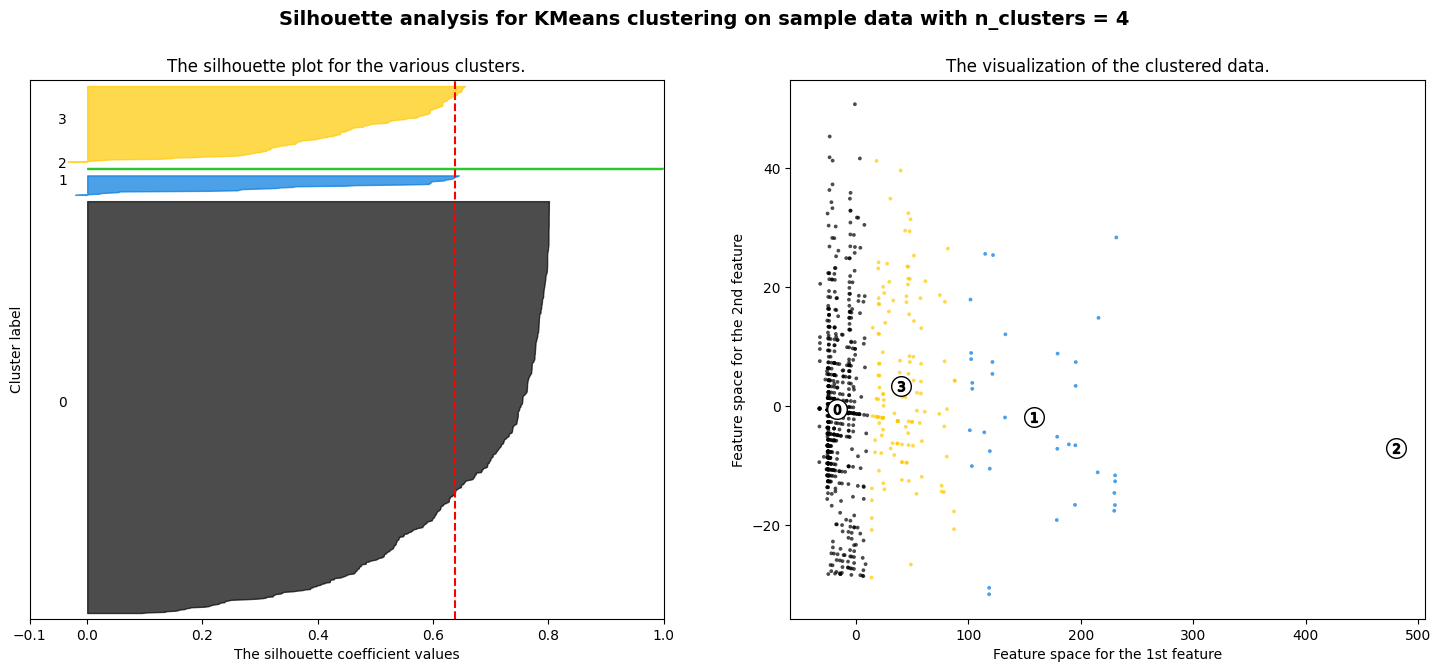

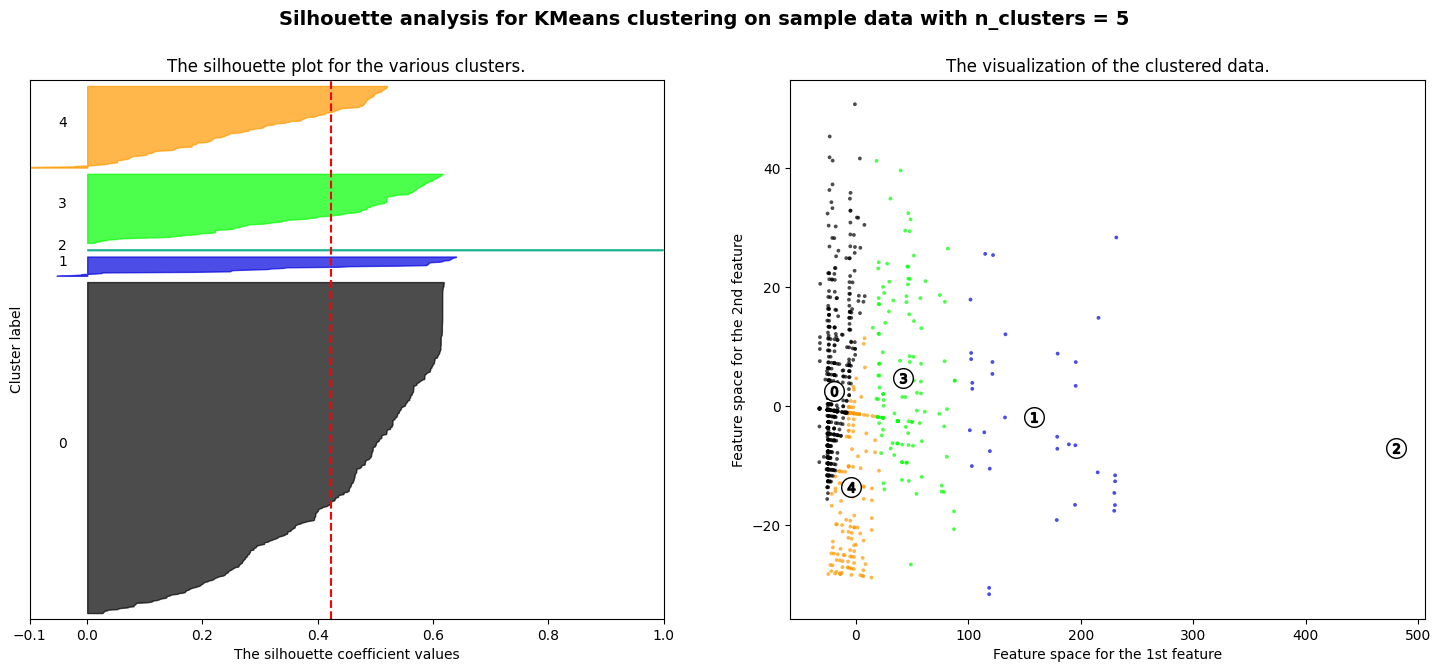

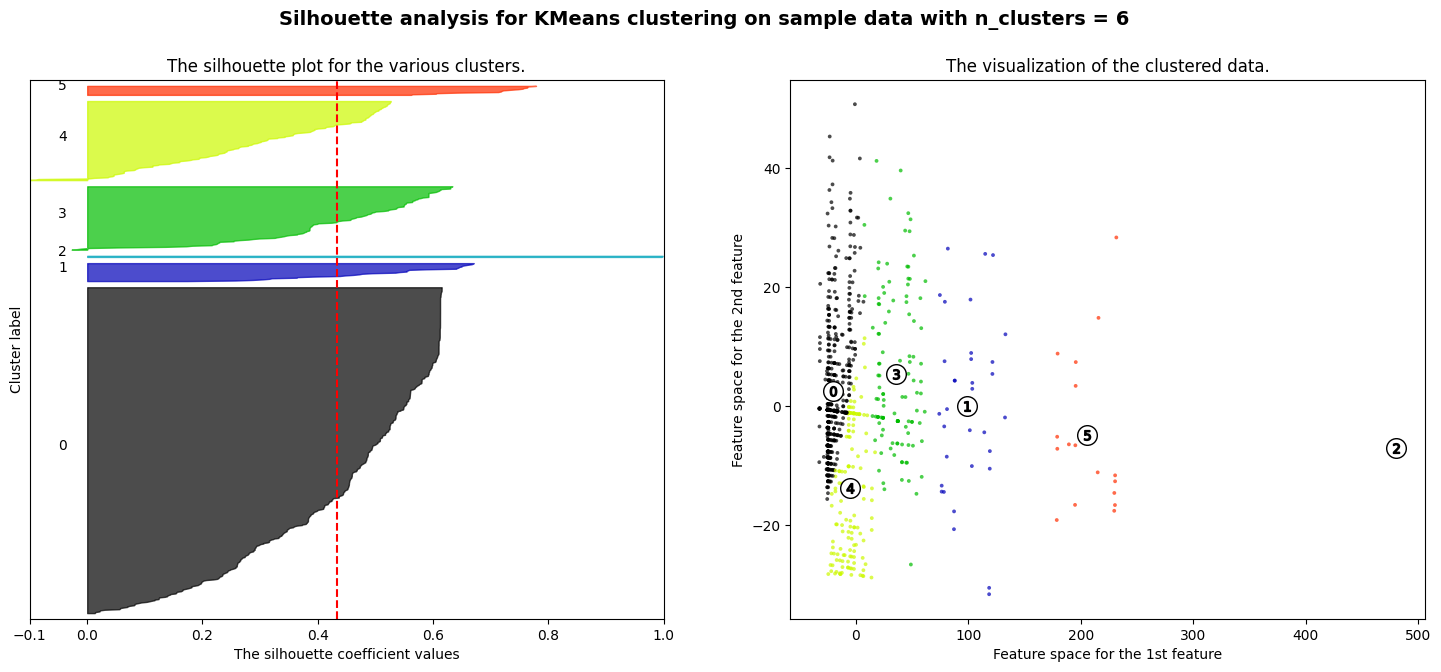

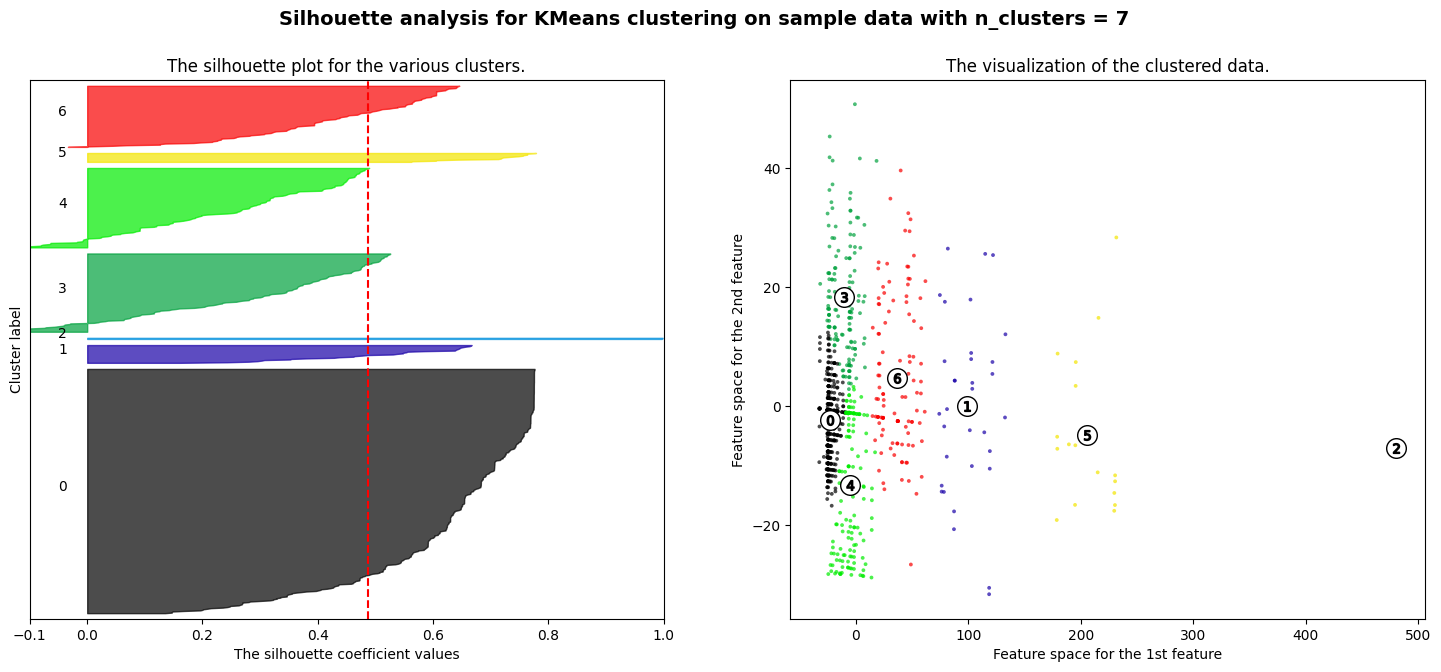

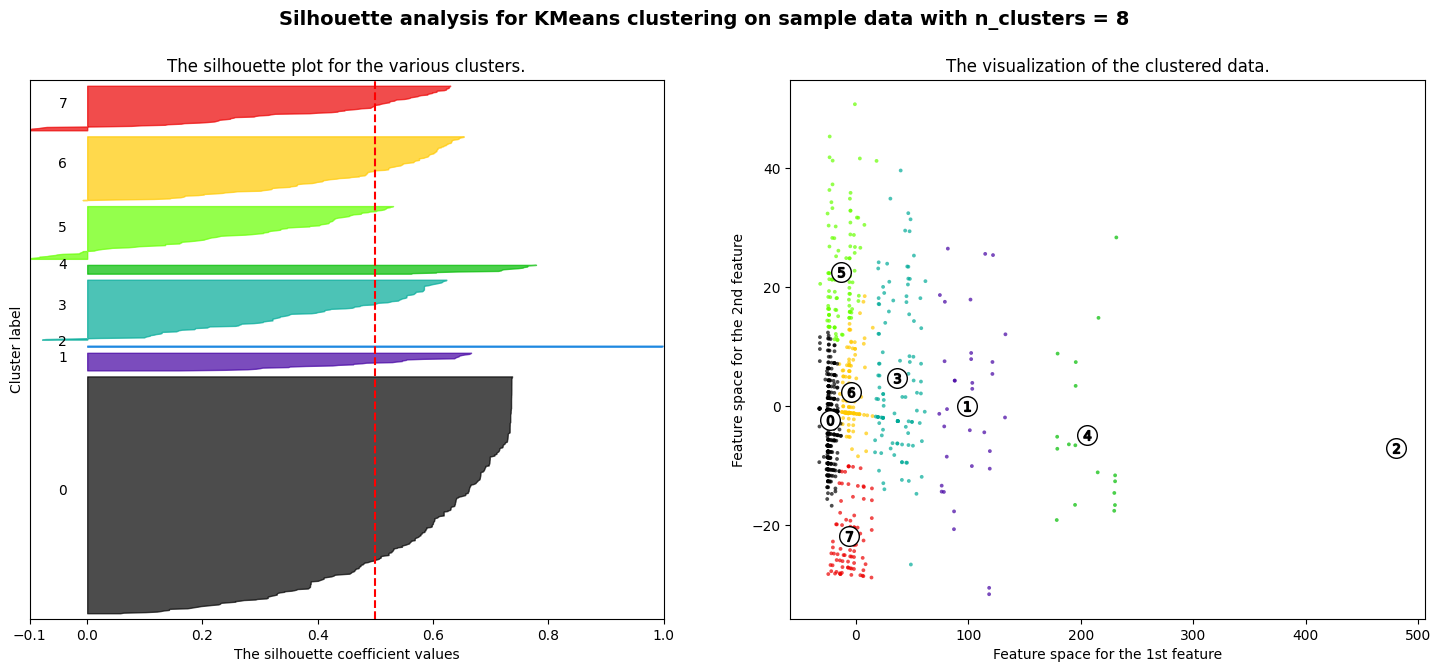

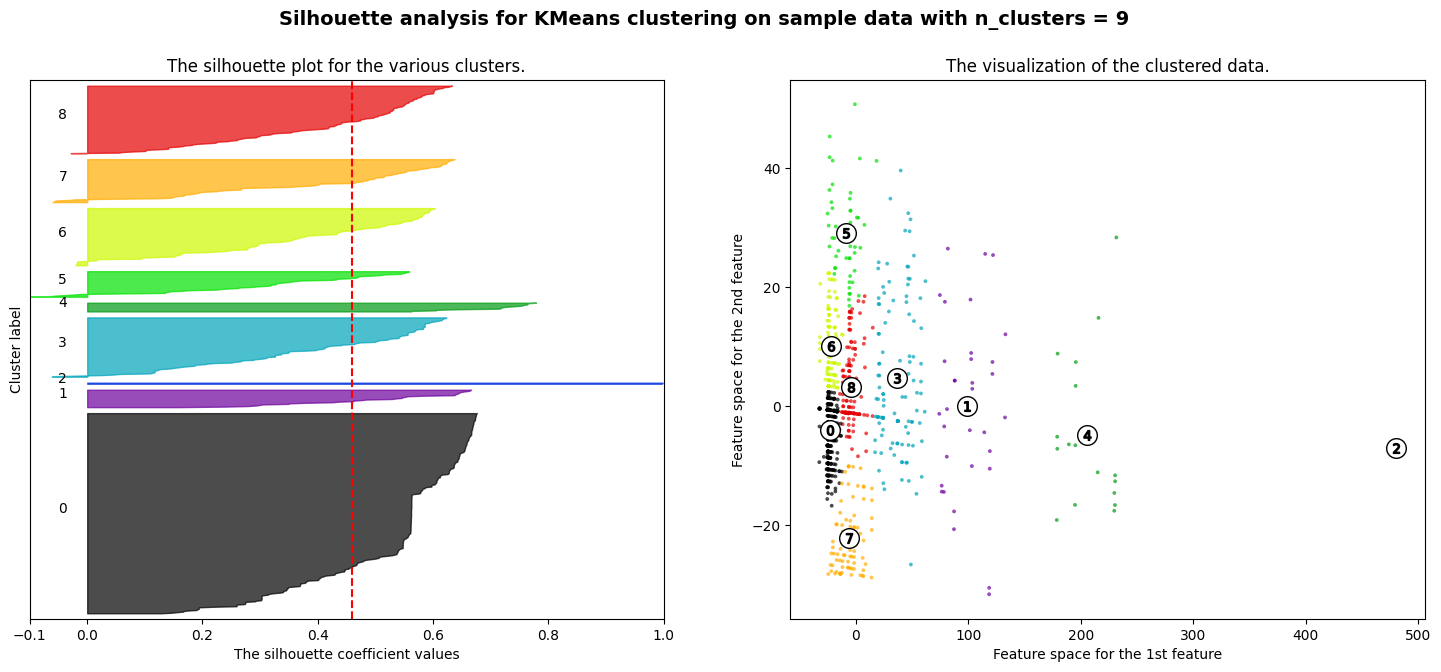

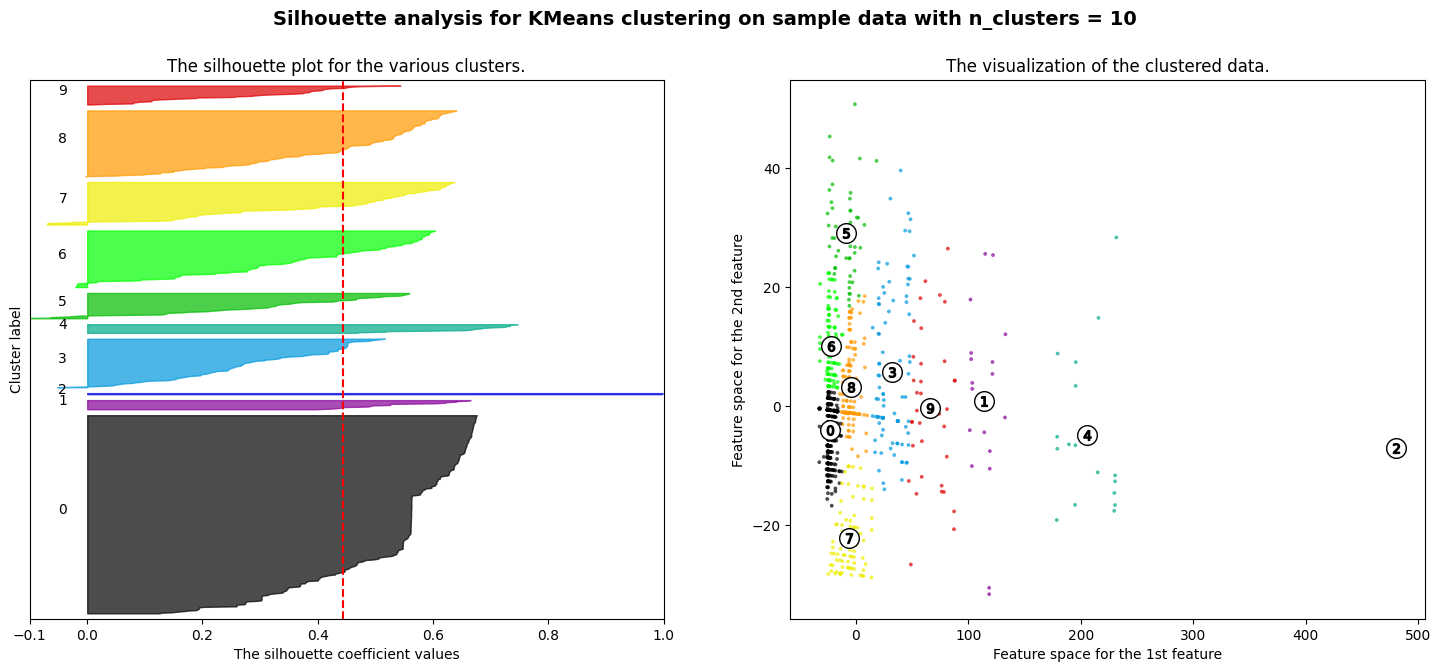

In [115]:
# Создадим пустой список для записи коэффициентов силуэта для каждого образца
sample_silhouette_values = []

# Воспользуемся функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
min_range = 2
max_range = 11  # до максимального, не включая

for i in range(min_range, max_range):
    # Создайте подзаголовок с 1 строкой и 2 столбцами
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Первый подсюжет — это график силуэта
    # Коэффициент силуэта может варьироваться от -1 до 1, но в этом примере все
    # лежат в пределах [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 предназначен для вставки пустого пространства между силуэтами
    # графики отдельных кластеров, чтобы четко их разграничить.
    ax1.set_ylim([0, len(full_reduced_data) + (i + 1) * 10])

    # Инициализируем кластеризатор значением n_clusters и генератором случайных чисел
    # начальное число из 10 для воспроизводимости.
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(full_reduced_data)

    # Silhouette_score дает среднее значение для всех образцов.
    # Это дает представление о плотности и разделении образовавшихся
    # clusters
    silhouette_avg = silhouette_score(full_reduced_data, cluster_labels)
    print(
        "For n_clusters =", i, "The average silhouette_score is :", silhouette_avg,
    ) # рассчет коэффициента, можно без визуализации

    # Вычисляем оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(full_reduced_data, cluster_labels)

    y_lower = 10
    for j in range(i):
        # Объединить оценки силуэтов для образцов, принадлежащих
        # кластер j и отсортируйте их
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]

        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / i)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            jth_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Пометьте графики силуэтов номерами их кластеров посередине.
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Вычисляем новый y_lower для следующего графика
        y_lower = y_upper + 10  # 10 для 0 образцов

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Вертикальная линия для средней оценки силуэта всех значений.
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Очистите метки/галочки Yaxis
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й график, показывающий фактически сформированные кластеры
    colors = cm.nipy_spectral(cluster_labels.astype(float) / i)
    ax2.scatter(
        reduced_data[:, 0], reduced_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Маркировка кластеров
    centers = clusterer.cluster_centers_
    # Нарисуйте белые круги в центрах кластеров
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for k, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % k, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % i,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
